# Full Phugoid Model

## Solve With Euler's Method

In [2]:
from math import sin, cos, log, ceil
import numpy as np
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
# model parameters:
g = 9.8      # gravity in m s^{-2}
v_t = 30.0   # trim velocity in m s^{-1}   
C_D = 1/40  # drag coefficient --- or D/L if C_L=1
C_L = 1   # for convenience, use C_L = 1

### set initial conditions ###
v0 = v_t     # start at the trim velocity (or add a delta)
theta0 = 0 # initial angle of trajectory
x0 = 0     # horizotal position is arbitrary
y0 = 1000  # initial altitude

In [4]:
def f(u):
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return np.array([-g*sin(theta) - (C_D/C_L)*(g/v_t**2)*v**2,
                      -(g/v)*cos(theta) + (g/v_t**2)*v,
                      v*cos(theta),
                      v*sin(theta)])

In [5]:
def euler_step(u, f, dt):
    return u + dt * f(u)

In [6]:
T = 100                          # final time
dt = 0.1                           # time increment
t = np.arange(0,T+dt,dt)      # time discretization
N = len(t)

# initialize the array containing the solution for each time-step
u = np.empty((N, 4))
u[0] = np.array([v0, theta0, x0, y0]) #fill first element with initial values

#time loop - Euler Method
for n in range(N-1):
    u[n+1] = euler_step(u[n], f, dt)

In [26]:
# get the glider's position with respect to the time
x = u[:,2]
y = u[:,3]

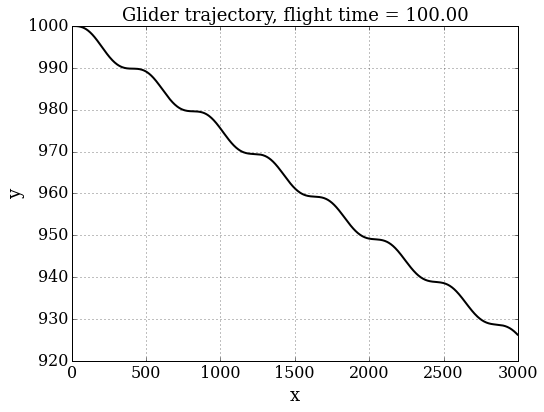

In [27]:
# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y, 'k-', lw=2);

## Grid Convergence

In [53]:
dt_values = np.array([0.1, 0.05, 0.01, 0.005, 0.001])

u_values = np.empty_like(dt_values, dtype = np.ndarray)

for i, dt in enumerate(dt_values):
    
    t=np.arange(0, T + dt, dt)
    N=len(t)
    
    u = np.empty((N, 4))
    u[0] = np.array([v0, theta0, x0, y0])
    
    for n in range(N-1):
        u[n+1] = euler_step(u[n], f, dt)
    
    u_values[i] = u

In [72]:
def get_diffgrid(u_current, u_fine, dt):
    
    N_current = np.shape(u_current)[0] #count rows in current grid
    N_fine = np.shape(u_fine)[0] #count rows in fine grid
    
    grid_size_ratio = ceil(N_fine/N_current)
    
    diffgrid = dt * np.sum(np.abs(u_current[:,2] - u_fine[::grid_size_ratio,2]))
    
    return diffgrid

In [75]:
# compute difference between one grid solution and the finest one
diffgrid = np.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    print('dt = %s' %dt)

    diffgrid[i] = get_diffgrid(u_values[i], u_values[-1], dt)

dt = 0.1
dt = 0.05
dt = 0.01
dt = 0.005
dt = 0.001


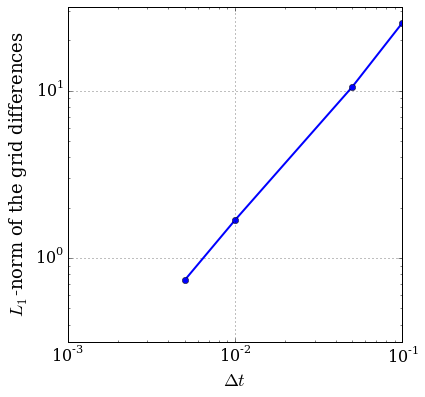

In [77]:
# log-log plot of the grid differences
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=18)
pyplot.ylabel('$L_1$-norm of the grid differences', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], color='b', ls='-', lw=2, marker='o');

In [82]:
r = 2
h = 0.001

dt_values2 = np.array([h, r*h, r**2*h])

u_values2 = np.empty_like(dt_values2, dtype=np.ndarray)

diffgrid2 = np.empty(2)

for i, dt in enumerate(dt_values2):
    
    N = int(T/dt) + 1   # number of time-steps
    
    ### discretize the time t ###
    t = np.linspace(0.0, T, N)
    
    # initialize the array containing the solution for each time-step
    u = np.empty((N, 4))
    u[0] = np.array([v0, theta0, x0, y0])

    # time loop
    for n in range(N-1):

        u[n+1] = euler_step(u[n], f, dt)         ### call euler_step() ###
    
    # store the value of u related to one grid
    u_values2[i] = u
    

#calculate f2 - f1
diffgrid2[0] = get_diffgrid(u_values2[1], u_values2[0], dt_values2[1])

#calculate f3 - f2
diffgrid2[1] = get_diffgrid(u_values2[2], u_values2[1], dt_values2[2])

# calculate the order of convergence
p = (log(diffgrid2[1]) - log(diffgrid2[0])) / log(r)

print('The order of convergence is p = %.3f' %p)

The order of convergence is p = 1.014


## Paper Airplane Challenge

Suppose you wanted to participate in a paper-airplane competition, and you want to use what you know about the phugoid model to improve your chances. For a given value of $L/D$ that you can obtain in your design, you want to know what is the best initial velocity and launch angle to fly the longest distance from a given height.

Using the phugoid model, write a new code to analyze the flight of a paper airplane, with the following conditions:

*  Assume $L/D$ of 5.0 (a value close to measurements in Feng et al. 2009)
*  For the trim velocity, let's take an average value of 4.9 m/s.
*  Find a combination of launch angle and velocity that gives the best distance.
*  Think about how you will know when the flight needs to stop ... this will influence how you organize the code.
*  How can you check if your answer is realistic?

In [51]:
# model parameters:
g = 9.8      # gravity in m s^{-2}
v_t = 4.9   # trim velocity in m s^{-1}   
C_D = 1/5  # drag coefficient --- or D/L if C_L=1
C_L = 1   # for convenience, use C_L = 1
M = 100;

### set initial conditions ###
v0 = np.linspace(0.1, 45, M) #100 possible initial v's ranging from 0 to 45 m/s
theta0 = np.linspace(0.1*np.pi, np.pi/2, M) # 100 possible initial angles of trajectory
x0 = 0     # horizotal position is arbitrary
y0 = 1.75  # initial altitude (height of average American male)

In [54]:
def q(u):
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return np.array([-g*sin(theta) - (C_D/C_L)*(g/v_t**2)*v*v,
                      -(g/v)*cos(theta) + (g/v_t**2)*v,
                      v*cos(theta),
                      v*sin(theta)])

In [58]:
print(v0[1]**2)

0.306401387614


In [59]:
T = 100                          # final time
dt = 0.1                           # time increment
t = np.arange(0,T+dt,dt)      # time discretization
N = len(t)


for m in range(M-1):
    u = np.empty((N, 4))
    u[0] = np.array([v0[m], theta0[m], x0, y0])
    
    for n in range(N-1):
        u[n+1] = euler_step(u[n], q, dt)
            
    
        #U = np.array([U, u])

C:\Users\croberts94\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: overflow encountered in double_scalars


ValueError: math domain error

In [220]:
T = 100                          # final time
dt = 0.1                           # time increment
t = np.arange(0,T+dt,dt)      # time discretization
N = len(t)

# initialize the array containing the solution for each time-step
u = np.empty((N, 4))
u[0] = np.array([v0, theta0, x0, y0]) #fill first element with initial values

#time loop - Euler Method
for n in range(N-1):
    u[n+1] = euler_step(u[n], q, dt)

In [ ]:
# get the glider's position with respect to the time
x = u[:,2]
y = u[:,3]

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'C:\\Users\\croberts94\\Desktop\\GitHub\\MAE6286\\connor_style.css'
HTML(open(css_file, "r").read())